# <center> Machine Learning Approaches to Drug Sensitivity Prediction - Dataset Analysis

Predicting drug response to assist creating the best treatment strategy from genomic information is an essential goal of precision medicine. We have noticed the collaborative effort between the National Cancer Institute (NCI) and the Dialogue on Reverse Engineering Assessment and Methods (DREAM) project which provides a cohort of genomic, epigenomic and proteomic profiling data sets measured in human breast cancer cell lines. We are very excited in selecting interesting drug targets and applying different supervised learning approaches to predict drug sensitivity for a panel of cell lines based on gene expression profiles.

We have selected 5 drugs for 46 cancer cell lines, each with the gene expression profiles for 18632 genes. For each specific drug, with high-dimensional gene expression values as features. Let's take a look at this dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [18]:
df = pd.read_csv('DREAM_data_T.csv')
#df.dropna(inplace=True)
df = pd.DataFrame(df)
df.fillna(-1, inplace = True)
df = np.transpose(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Unnamed: 0,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,HCC202,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
Everolimus(mTOR),0,0,-1,-1,1,0,1,1,1,-1,...,0,1,0,0,1,1,-1,-1,1,0
Disulfiram(ALDH2),0,1,1,1,0,0,0,1,-1,0,...,0,-1,1,1,1,-1,1,-1,1,0
Methylglyoxol(Pyruvate),-1,0,1,-1,1,-1,0,-1,0,-1,...,0,-1,1,0,0,-1,-1,0,1,1
Mebendazole(Tubulin),-1,0,1,0,1,0,0,1,1,1,...,0,-1,-1,0,0,1,1,1,0,0


Then, let’s have a look at data dimensionality and more detailed information

In [19]:
print(df.shape)

(18638, 46)


In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
count,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,...,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0,18638.0
unique,18630.0,18633.0,18629.0,18634.0,18631.0,18633.0,18635.0,18631.0,18636.0,18634.0,...,18634.0,18629.0,18632.0,18633.0,18630.0,18631.0,18632.0,18634.0,18632.0,18629.0
top,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,-1.0,1.0,0.0,1.0,1.0,-1.0,0.0,1.0,0.0
freq,3.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,3.0,2.0,...,4.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,3.0


In [21]:
#Using Pearson Correlation
data = df[1:]
data.astype(float)
print(data.shape)
data.head()

(18637, 46)


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Everolimus(mTOR),0,0,-1,-1,1,0,1,1,1,-1,...,0,1,0,0,1,1,-1,-1,1,0
Disulfiram(ALDH2),0,1,1,1,0,0,0,1,-1,0,...,0,-1,1,1,1,-1,1,-1,1,0
Methylglyoxol(Pyruvate),-1,0,1,-1,1,-1,0,-1,0,-1,...,0,-1,1,0,0,-1,-1,0,1,1
Mebendazole(Tubulin),-1,0,1,0,1,0,0,1,1,1,...,0,-1,-1,0,0,1,1,1,0,0
4-HC(DNA alkylator),-1,0,1,1,0,-1,-1,1,1,0,...,-1,-1,1,1,1,1,-1,0,1,1


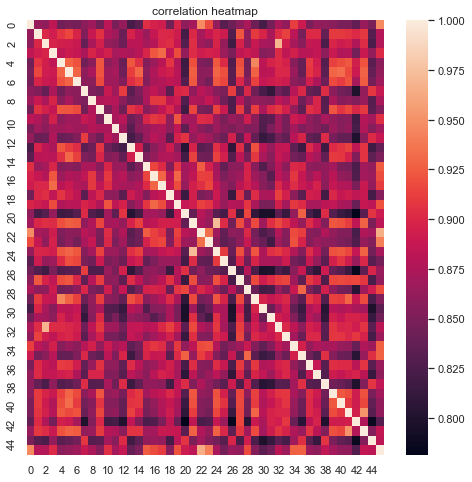

In [22]:
plt.figure(figsize=(8,8))
data = data.apply(pd.to_numeric)
corr = data.corr(method='pearson', min_periods=1)
sns.heatmap(corr)
plt.title("correlation heatmap")
plt.savefig("corr.png")
plt.show()


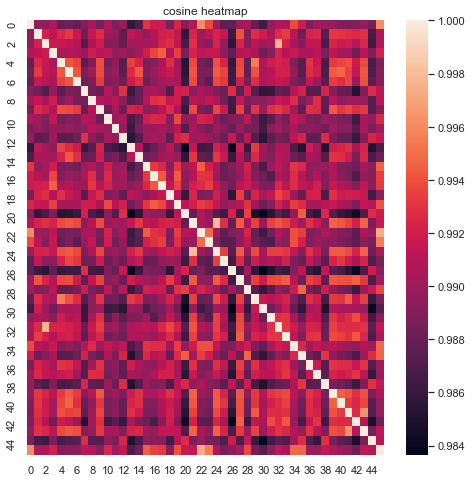

In [23]:
import sklearn.preprocessing as pp
import scipy

def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)
    return col_normed_mat.T * col_normed_mat

cosine = cosine_similarities(scipy.sparse.csr_matrix(data.to_numpy()))
cosine = pd.DataFrame(cosine.toarray())
plt.figure(figsize=(8, 8))
sns.heatmap(cosine)
plt.title("cosine heatmap")
plt.savefig("cos.png")
plt.show()


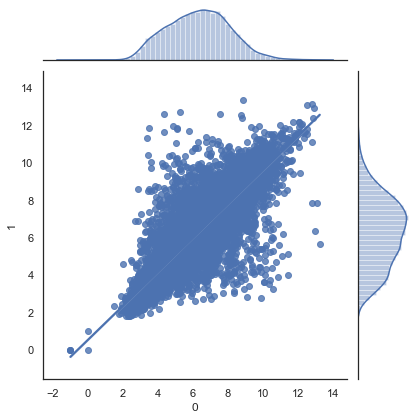

In [24]:
sns.jointplot(data.loc[:,0], data.loc[:,1], kind="regg")

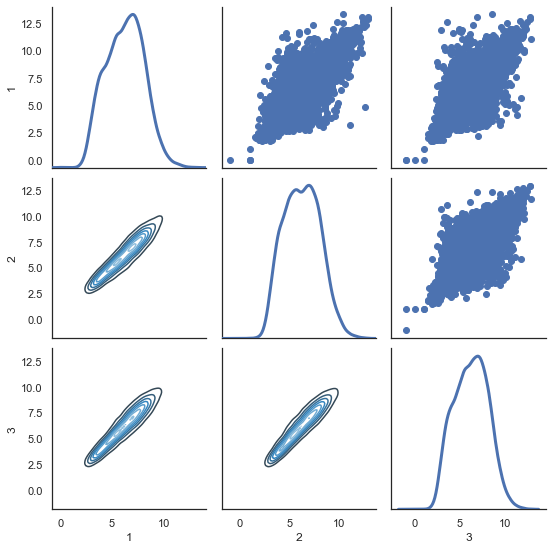

In [25]:
sns.set(style="white")
dataf = data.loc[:,[1, 2, 3]]
g = sns.PairGrid(dataf, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig("visualization.png")

Let's try some classic feature reduction techniques:

In [26]:
data = np.transpose(data)
print(data.shape)

(46, 18637)


In [27]:
from sklearn.decomposition import PCA
n_components = 46
pca =  PCA(n_components=n_components, whiten = False, random_state = 2020)
pca.fit(data)
data_pca = pca.transform(data)
print(data_pca.shape)

(46, 46)


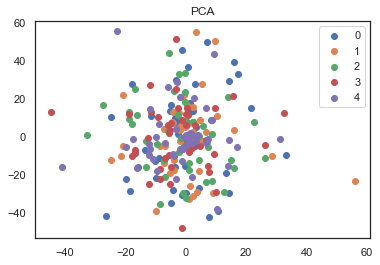

In [33]:
plt.scatter(data_pca[1, :], data_pca[:, 1], label='0')
plt.scatter(data_pca[2, :], data_pca[:, 2], label='1')
plt.scatter(data_pca[3, :], data_pca[:, 3], label='2')
plt.scatter(data_pca[4, :], data_pca[:, 4], label='3')
plt.scatter(data_pca[5, :], data_pca[:, 5], label='4')

plt.title("PCA")
plt.legend()
plt.savefig("PCA.png")
plt.show()

In [37]:
from sklearn.manifold import MDS
mds = MDS(n_components=46, n_init=12, max_iter=1200, metric=True, n_jobs=4, random_state=2020)
data_mds = mds.fit_transform(data)
print(data_mds.shape)

(46, 46)


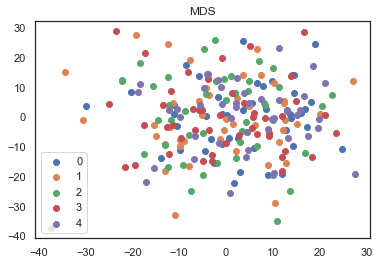

In [38]:
plt.scatter(data_mds[1, :], data_mds[:, 1], label='0')
plt.scatter(data_mds[2, :], data_mds[:, 2], label='1')
plt.scatter(data_mds[3, :], data_mds[:, 3], label='2')
plt.scatter(data_mds[4, :], data_mds[:, 4], label='3')
plt.scatter(data_mds[5, :], data_mds[:, 5], label='4')

plt.legend()
plt.title("MDS")
plt.savefig("MDS.png")
plt.show()


In [39]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=154,algorithm='randomized', random_state=2019, n_iter=5)
SVD.fit(data)
data_svd = SVD.transform(data)

print(data_svd.shape)

(46, 46)


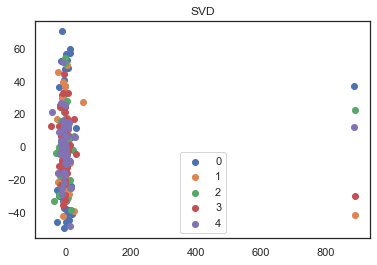

In [40]:
plt.scatter(data_svd[1, :], data_svd[:, 1], label='0')
plt.scatter(data_svd[2, :], data_svd[:, 2], label='1')
plt.scatter(data_svd[3, :], data_svd[:, 3], label='2')
plt.scatter(data_svd[4, :], data_svd[:, 4], label='3')
plt.scatter(data_svd[5, :], data_svd[:, 5], label='4')

plt.title("SVD")
plt.savefig("TruncatedSVD.png")
plt.legend()
plt.show()
